## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

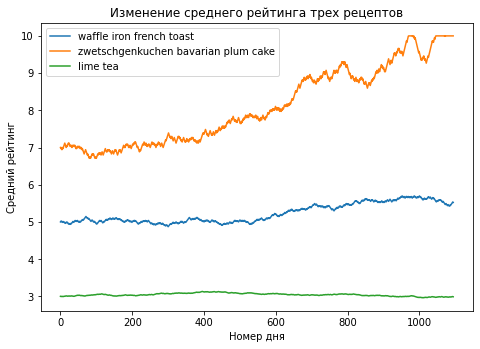

In [ ]:
a = np.load('/content/drive/MyDrive/tod lr 5/average_ratings.npy')
fig = plt.figure().add_axes([0.1, 0.1, 1, 1])
line1, = fig.plot(a[0], label='waffle iron french toast')
line2, = fig.plot(a[1], label='zwetschgenkuchen bavarian plum cake')
line3, = fig.plot(a[2], label='lime tea')
fig.legend(handles=[line1, line2, line3], loc='best')
fig.set_xlabel('Номер дня')
fig.set_ylabel('Средний рейтинг')
fig.set_title('Изменение среднего рейтинга трех рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

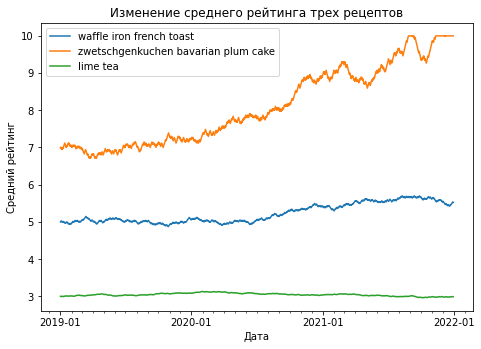

In [ ]:
dates = pd.date_range(start='1/1/2019', end='30/12/2021')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
line1, = ax.plot(dates, a[0], label='waffle iron french toast')
line2, = ax.plot(dates, a[1], label='zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(dates, a[2], label='lime tea')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.legend(handles=[line1, line2, line3], loc='best')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

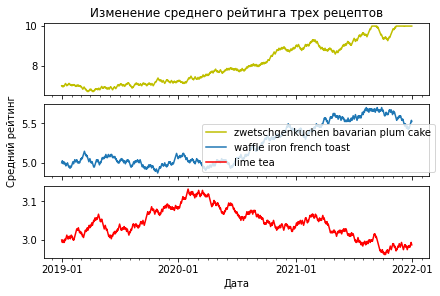

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, layout='constrained', sharex='col')
line1, = axes[0].plot(dates, a[1], 'y', label='zwetschgenkuchen bavarian plum cake')
line2, = axes[1].plot(dates, a[0], label='waffle iron french toast')
line3, = axes[2].plot(dates, a[2], 'r', label='lime tea')
for el in axes:
    el.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
    el.xaxis.set_minor_locator(mdates.MonthLocator())
fig.legend(handles=[line1, line2, line3], loc='right')
axes[-1].set_xlabel('Дата')
axes[1].set_ylabel('Средний рейтинг')
axes[0].set_title('Изменение среднего рейтинга трех рецептов')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


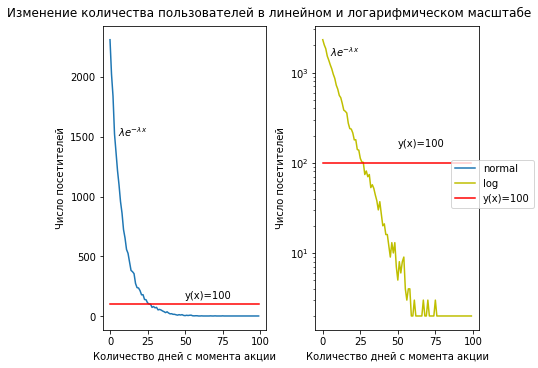

In [ ]:
data = np.load('/content/drive/MyDrive/tod lr 5/visitors.npy')
fig, axes = plt.subplots(figsize=(6, 5), nrows=1, ncols=2, layout='constrained')
line1, = axes[0].plot(data, label='normal')
line2, = axes[1].plot(data, 'y', label='log')
axes[1].set_yscale('log')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
const = [100 for i in range(100)]
b = r'−λx'
for el in axes:
    line, = el.plot(const, 'r', label=r'y(x)=100')
    el.set_xlabel('Количество дней с момента акции')
    el.set_ylabel('Число посетителей')
    el.text(5, 1500, r'$λe^{−λx}$')
    el.text(50, 150, r'y(x)=100')
fig.legend(handles=[line1, line2, line], loc='right')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
recipes = pd.read_csv('/content/drive/MyDrive/tod lr2/recipes_sample.csv')
reviews = pd.read_csv('/content/drive/MyDrive/tod lr2/reviews_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
short = recipes[recipes['minutes'] < 5]
long = recipes[recipes['minutes'] >= 50]
medium = recipes[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50)]
short_len = len(short)
long_len = len(long)
medium_len = len(medium)
short_mean = short['n_steps'].mean()
long_mean = long['n_steps'].mean()
medium_mean = medium['n_steps'].mean()
df = pd.DataFrame({'Длинные' : long_mean, 'Средние' : medium_mean,'Короткие' : short_mean},\
                  index=["Группа рецептов"])
df1 = pd.DataFrame({'Процент' : [long_len, medium_len, short_len]}, index=['Длинные', 'Средние', 'Короткие'])

Text(0, 0.5, 'Средняя длительность')

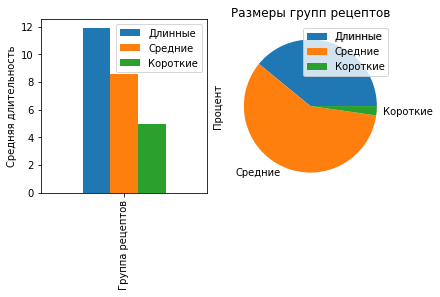

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, layout='constrained')
df.plot.bar(ax=axes[0])
df1.plot.pie(ax=axes[1], y='Процент')
axes[1].set_title('Размеры групп рецептов')
axes[0].set_ylabel('Средняя длительность')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [ ]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews1 = reviews[(reviews['date'] >= '2008-01-01') \
                   & (reviews['date'] <= '2009-12-31')]
reviews1_2008 = reviews1[(reviews['date'] >= '2008-01-01') \
                         & (reviews1['date'] <= '2008-12-31')]
reviews1_2009 = reviews1[(reviews1['date'] >= '2009-01-01') \
                         & (reviews1['date'] <= '2009-12-31')]

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

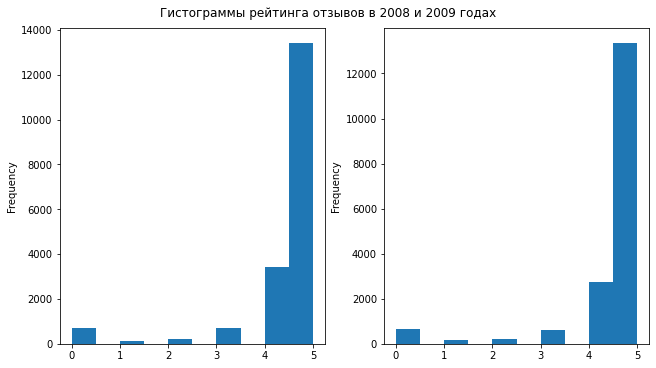

In [ ]:
fig, axes = plt.subplots(figsize=(9,5), nrows=1, ncols=2, layout='constrained')
reviews1_2008['rating'].plot.hist(ax=axes[0])
reviews1_2009['rating'].plot.hist(ax=axes[1])
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [ ]:
recipes['cat'] = ['short' if i < 5 else 'long' if i >= 50 else 'medium' for i in recipes['minutes']]

Text(0.5, 0.98, 'Диаграмма рассеяния n_steps и n_ingredients')

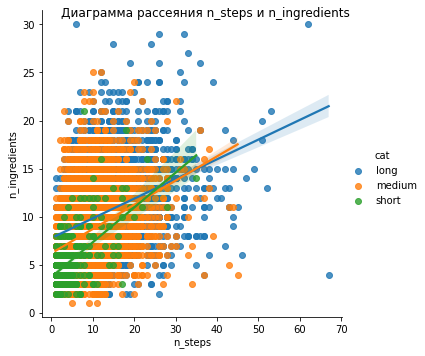

In [ ]:
sns.lmplot(\
                data=recipes,
                x='n_steps',
                y='n_ingredients',
                hue='cat').fig.suptitle('Диаграмма рассеяния n_steps и n_ingredients')

С помощью линий регрессии видно линейную зависимость, у коротких рецептов коэффициент наклона больше, чем у длинных

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"